## Q2.2 K-Means, Mixture Models and EM Algorithms

#### Q2.2.1 Data Preprocessing

In [2]:
import pandas as pd

In [3]:
abalone = pd.read_csv('abalone.data', header=None)#, names=column_names)
print(abalone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


As can be seen, there are 8 columns in the dataset, and their names are unassigned. Each column contains 4177 non null data. The column names corresponding to its column order can be found in .names file.

In [4]:
# Find column names matched with above info
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 
    'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv('abalone.data', header=None, names=column_names)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [5]:
print(data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


One hot encoding is implemented to replace the categorical data into boolean type for further transformation, since string type is not suitable for calculation.

In [6]:
## One - hot Encoding for categorical data
abalone_data = pd.get_dummies(data,columns = ['Sex'],drop_first=True)
print(abalone_data.head())
print()
print(abalone_data.info())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_I  Sex_M  
0         0.150     15  False   True  
1         0.070      7  False   True  
2         0.210      9  False  False  
3         0.155     10  False   True  
4         0.055      7   True  False  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height    

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize (exclude 'Rings')
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
abalone_data[numerical_columns] = scaler.fit_transform(abalone_data[numerical_columns])
print(abalone_data.head())


     Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  Rings  Sex_I  Sex_M  
0      0.147982     15  False   True  
1      0.068261      7  False   True  
2      0.207773      9  False  False  
3      0.152965     10  False   True  
4      0.053313      7   True  False  


In [8]:
# Transform 'Rings' to 'Age' (years)
abalone_data['Age'] = abalone_data['Rings'] + 1.5

# Remove the 'Rings' column
abalone_data = abalone_data.drop(columns=['Rings'])
print(abalone_data.head())

     Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  Sex_I  Sex_M   Age  
0      0.147982  False   True  16.5  
1      0.068261  False   True   8.5  
2      0.207773  False  False  10.5  
3      0.152965  False   True  11.5  
4      0.053313   True  False   8.5  


In [9]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Sex_I           4177 non-null   bool   
 8   Sex_M           4177 non-null   bool   
 9   Age             4177 non-null   float64
dtypes: bool(2), float64(8)
memory usage: 269.3 KB


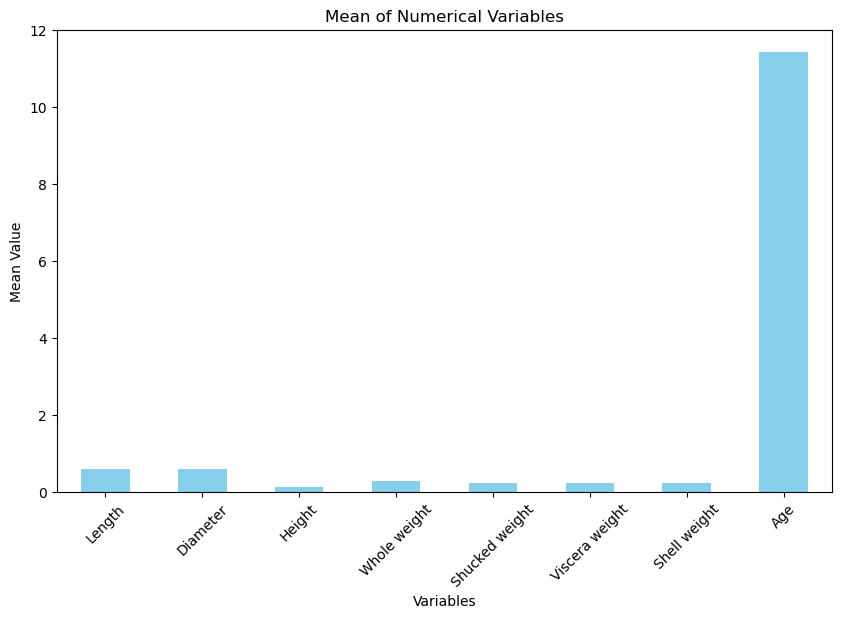

In [10]:
import matplotlib.pyplot as plt

# Plot bar charts for numerical variables
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age']

# Plot bar charts for each numerical column
abalone_data[numerical_columns].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Mean of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


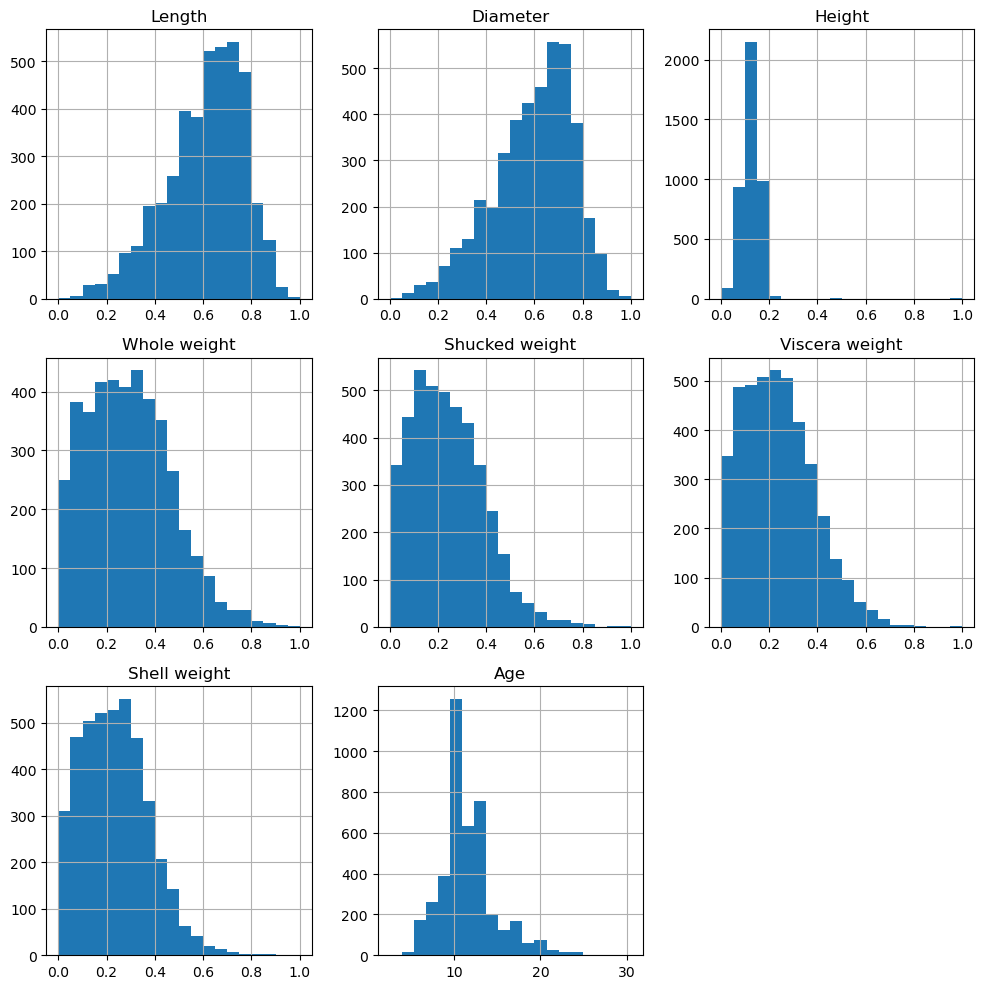

In [11]:
# Histogram for each numeric column
abalone_data[numerical_columns].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

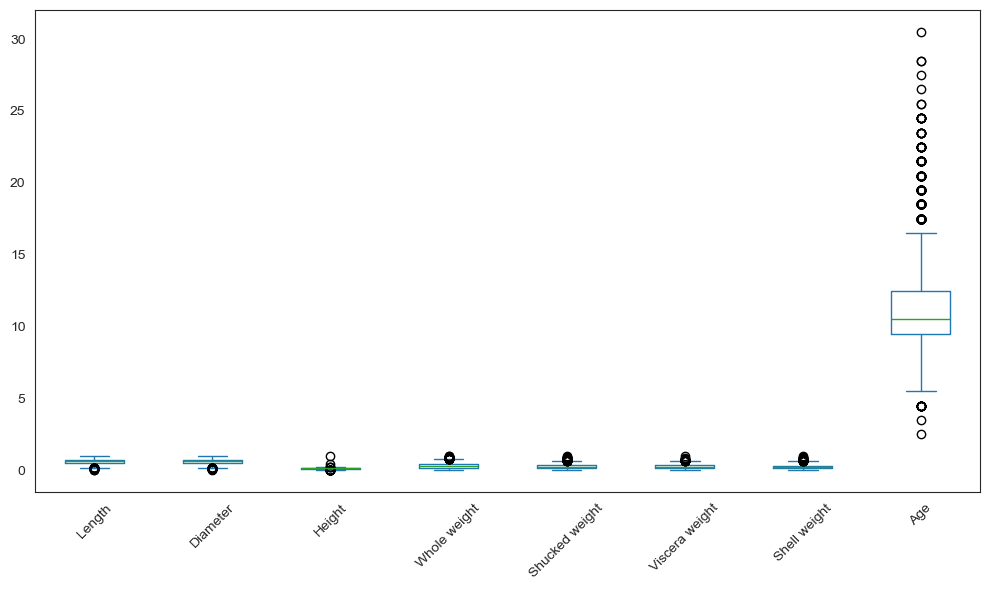

In [22]:
abalone_data[numerical_columns].plot(kind='box', figsize=(10, 6))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q2.2.2 K-Means Clustering 

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop target variable 'Age' for clustering
X = abalone_data.drop(columns=['Age'])

# i) Construct K-Means model with k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# ii) Compute and print Silhouette Coefficients
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Coefficient: {sil_score}")


Silhouette Coefficient: 0.5470483921709526


### Q2.2.3 GMM and EM Algorithms

Fit Gaussian Mixture Model with two Guassians on ['Whole weights'] column using EM Algorithm with 20 iterations.

EM Algorithm, i.e. Expectation-Maximization is an iterative method to find maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables.

E Step:

M Step:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform


Fit Gaussian Mixture Model with 2 Gaussians on [’Whole weights’] using EM Algorithm
(choose number of iteration = 20).

For GMM of 2 gaussians, there are two Normal Distributions:
$$ N(\mu_1,\sigma_1^2)$$

$$N(\mu_2,\sigma_2^2)$$

So there are 5 paramters to estimate:$$ \theta = (\omega,\mu_1,\sigma_1^2,\mu_2,\sigma_2^2)$$

The objective is to best fit a given pdf using the optimal paramter list through EM iterations.

In [14]:
class Gaussian: # Get the probability function of dataset 
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
       # a special representation, where 0 & 1 indicates the parameter index (0 for mu 1 for sigma), 6 indicates the precision.
print("done")

done


In [15]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end
        
        # init with multiple gaussians
        # The input of initial gaussian would not impact the final answer if the iterations are enough
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        # init the weight \omega, set as 50% initially 
        self.mix = mix

    def Estep(self): # Calculate weights for each datapoint, each one has two possibility (left, rigt)
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:  
            # unnormalized weights \omega
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den   
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights): # Updates parameters using weighted averages
        "Perform an M(aximization)-step"
        # compute denominators
        data_array = np.array(self.data)
        (left, rigt) = zip(*weights) 
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data_array)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data_array)) / two_den
        
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data_array)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data_array)) / two_den)
        # compute new mix
        self.mix = one_den / len(self.data)

        
    def iterate(self, N = 20, verbose=False): # preset the itration to run 20 times
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)
print("done")

done


In [16]:
# Extract 'Whole weight' column from the abalone dataset
whole_weights = abalone_data['Whole weight'].values


# Now, use the GaussianMixture_self class for fitting
gmm = GaussianMixture_self(data=whole_weights, mu_min=min(whole_weights), mu_max=max(whole_weights), 
                           sigma_min=1, sigma_max=1, mix=0.5)

# Fit the model using 20 iterations
gmm.iterate()

# Print the fitted Gaussian Mixture model
print(gmm)


Mixture: Gaussian(0.38424, 0.176493), Gaussian(0.211836, 0.123773), mix=0.47)


#### ii) Plot fitted GMM

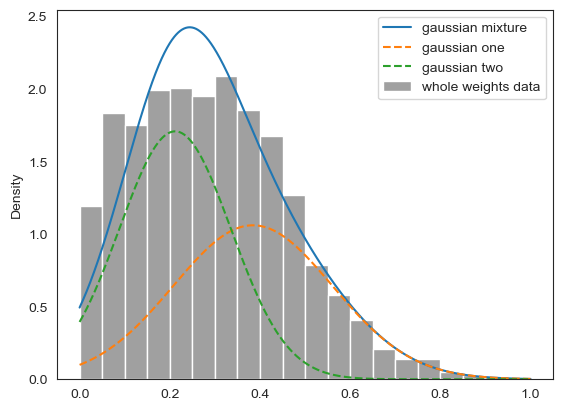

In [17]:
#sns.displot(whole_weights,bins=20,kde=false)
sns.histplot(whole_weights, bins=20, kde=False, stat="density", discrete=False,color='grey',label = 'whole weights data')

x = np.linspace(min(whole_weights), max(whole_weights), 2000)
g_both = [gmm.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture')
g_left = [gmm.one.pdf(e) * gmm.mix for e in x]
plt.plot(x, g_left, label='gaussian one',linestyle='--');
g_right = [gmm.two.pdf(e) * (1-gmm.mix) for e in x]
plt.plot(x, g_right, label='gaussian two',linestyle='--');
plt.legend()
plt.show()


#### iii）SKlearn Fitted GMM

Mixture: Gaussian(0.168589, 0.096994), Gaussian(0.412434, 0.144819), mix=0.491)


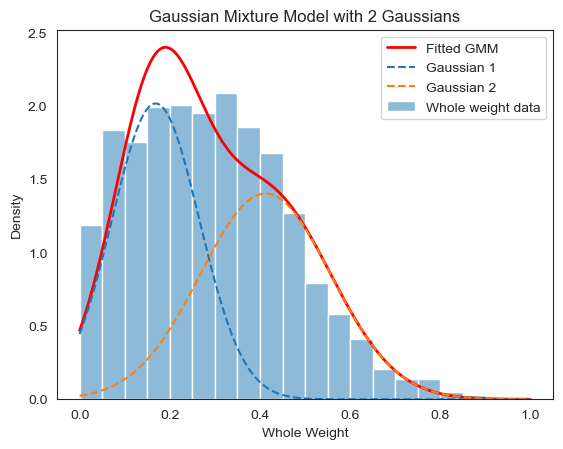

In [18]:
from sklearn.mixture import GaussianMixture

# Assuming `abalone_data` is the processed DataFrame and `Whole weight` column exists

# Step 1: Extract the 'Whole weight' column
whole_weights_fit = abalone_data['Whole weight'].values.reshape(-1, 1)  # Reshape for sklearn input

# Step 2: Fit the Gaussian Mixture Model with 2 components
gmm_sk = GaussianMixture(n_components=2, random_state=42)
gmm_sk.fit(whole_weights_fit)

# Step 3: Plot the histogram of 'Whole weight' data
sns.histplot(whole_weights_fit, bins=20, kde=False, stat="density", color='gray', label='Whole weight data')

# Step 4: Plot the fitted GMM
x_sk = np.linspace(whole_weights_fit.min(), whole_weights_fit.max(), 1000).reshape(-1, 1)  # Create a range of values for plotting
logprob = gmm_sk.score_samples(x_sk)  # Log of the probability density for the range of values
pdf = np.exp(logprob)  # Convert log to actual probability density

# Plot the GMM components
plt.plot(x_sk, pdf, label='Fitted GMM', color='red', linewidth=2)

# Optional: Plot the individual Gaussian components
weights = gmm_sk.weights_
means = gmm_sk.means_.flatten()
covariances = gmm_sk.covariances_.flatten()
sigmas = np.sqrt(covariances)

for i in range(2):
    gaussian = weights[i] * (1 / np.sqrt(2 * np.pi * covariances[i])) * np.exp(-0.5 * ((x_sk - means[i]) ** 2) / covariances[i])
    plt.plot(x_sk, gaussian, label=f'Gaussian {i+1}', linestyle='--')

# Add labels and legend
plt.title('Gaussian Mixture Model with 2 Gaussians')
plt.xlabel('Whole Weight')
plt.ylabel('Density')
plt.legend()

print(f"Mixture: Gaussian({means[0]:.6f}, {sigmas[0]:.6f}), Gaussian({means[1]:.6f}, {sigmas[1]:.6f}), mix={weights[0]:.3f})")
# Show the plot
plt.show()


#### iv) Fit GMM using all predictors

In [19]:
# Select all predictor columns (exclude 'Age')
predictor_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
                     'Viscera weight', 'Shell weight', 'Sex_I', 'Sex_M']

X = abalone_data[predictor_columns].copy()

# Convert boolean columns to integers
X['Sex_I'] = X['Sex_I'].astype(int)
X['Sex_M'] = X['Sex_M'].astype(int)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Print the fitted parameters
print('Means:\n', gmm.means_)
print('\nCovariances:\n', gmm.covariances_)
print('\nWeights:\n', gmm.weights_)

Means:
 [[0.47668365 0.4562925  0.09557126 0.15206748 0.12779759 0.12048724
  0.12624035 1.         0.        ]
 [0.66831355 0.65782758 0.13667026 0.3594295  0.29458695 0.29233216
  0.28869802 0.         0.53897707]]

Covariances:
 [[[ 2.16247667e-02  2.14651260e-02  3.78133184e-03  1.37264503e-02
    1.13963787e-02  1.08709451e-02  1.13094458e-02  0.00000000e+00
    0.00000000e+00]
  [ 2.14651260e-02  2.19130090e-02  3.82626961e-03  1.38581313e-02
    1.14891221e-02  1.09623468e-02  1.14439843e-02  0.00000000e+00
    0.00000000e+00]
  [ 3.78133184e-03  3.82626961e-03  8.02096016e-04  2.55789621e-03
    2.07884548e-03  2.03504821e-03  2.11119462e-03  0.00000000e+00
    0.00000000e+00]
  [ 1.37264503e-02  1.38581313e-02  2.55789621e-03  1.02732717e-02
    8.48272135e-03  8.11739840e-03  8.29106921e-03  0.00000000e+00
    0.00000000e+00]
  [ 1.13963787e-02  1.14891221e-02  2.07884548e-03  8.48272135e-03
    7.45209956e-03  6.60999885e-03  6.66743665e-03  0.00000000e+00
    0.00000000e+00

#### v) silhoutte coefficient for GMM models & comparison with K Means

In [20]:
gmm_labels = gmm_sk.predict(whole_weights_fit)
gmm_score = silhouette_score(whole_weights_fit, gmm_labels)
print(f"""The silhouette coefficient for GMM modelled in iii) is {gmm_score}.\n""")
print(f"""The silhouette coefficient for K Means modelled in 2.2.2) is {sil_score}.\n""")

The silhouette coefficient for GMM modelled in iii) is 0.5804321592203657.

The silhouette coefficient for K Means modelled in 2.2.2) is 0.5470483921709526.



In [21]:
gmm_all_labels = gmm.predict(X)
gmm_all_score = silhouette_score(X, gmm_all_labels)
print(gmm_all_score)

0.5444880265968582


Based on the silhouette coefficients, I prefer the Gaussian Mixture Model (GMM) over the K-Means clustering. The GMM achieved a higher silhouette score of 0.5804 compared to 0.5470 for K-Means, indicating that GMM provides better-defined and more cohesive clusters for the 'Whole weight' data.